MOST DEMANDED SKILLS FOR TOP 3 DATA ROLES

METHODOLOY:
1.Clean the skill coloumn as it is in string format
2.Calculate skill count based on job_title _short
3.Calculate skill percentage
4.Plot final findings

In [2]:
#importing libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [30]:
df_ind=df[(df['job_country']== "India") ]
df_skills=df_ind.explode("job_skills")
df_skillscount=df_skills.groupby(["job_skills","job_title_short"]).size()
df_skillscount=df_skillscount.reset_index(name="skill_count")
df_skillscount.sort_values(by="skill_count",ascending=False,inplace=True)


In [38]:
job_titles=df_skillscount["job_title_short"].unique()
job_titles.tolist()
job_titles=job_titles[:3]




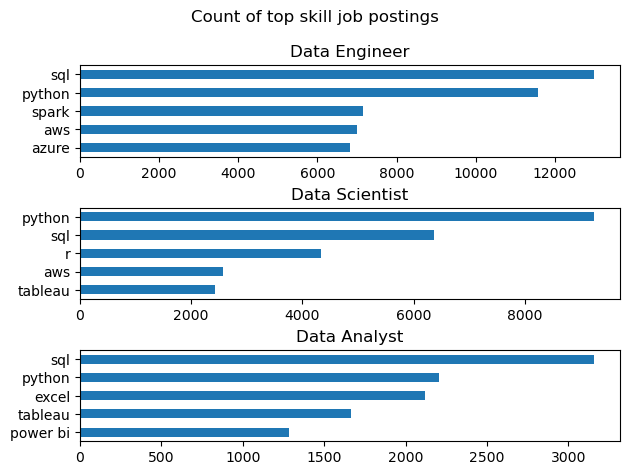

In [29]:
fig,ax=plt.subplots(len(job_titles),1)
for i,job_title in enumerate(job_titles):
     df_plot=df_skillscount[df_skillscount["job_title_short"]== job_title].head(5)
     df_plot[::-1].plot(kind="barh",x="job_skills",y="skill_count",ax=ax[i],title=job_title)
     ax[i].set_ylabel('')
     ax[i].legend().set_visible(False)
fig.suptitle("Count of top skill job postings")
fig.tight_layout(h_pad=0.5)
     
     

PERCENTAGE OF A SKILL IN JOB POSTING

In [46]:
df_job_title_count = df_ind['job_title_short'].value_counts().reset_index(name="jobs_total")
df_skills_percent=pd.merge(df_skillscount,df_job_title_count, how="left", on='job_title_short')
df_skills_percent['skill_percent']=100*(df_skills_percent["skill_count"]/df_skills_percent["jobs_total"])
df_skills_percent


,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,esquisse,Data Scientist,1,13279,0.007531
1685,node.js,Senior Data Analyst,1,1083,0.092336
1686,matlab,Cloud Engineer,1,351,0.284900
1687,fastapi,Cloud Engineer,1,351,0.284900


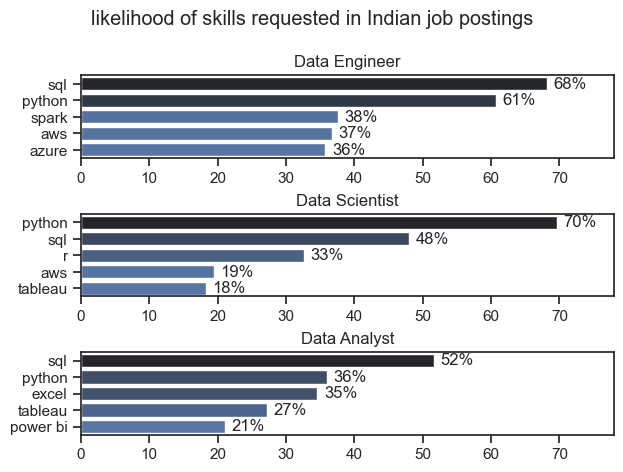

In [59]:
fig,ax=plt.subplots(len(job_titles),1)
for i,job_title in enumerate(job_titles):
     df_plot=df_skills_percent[df_skills_percent["job_title_short"]== job_title].head(5)
     #df_plot[::-1].plot(kind="barh",x="job_skills",y="skill_percent",ax=ax[i],title=job_title)
     sns.barplot(data=df_plot,x="skill_percent",y="job_skills",ax=ax[i],hue="skill_count",palette="dark:b_r")
     sns.set_theme(style='ticks')
     ax[i].set_ylabel('')
     ax[i].legend().set_visible(False)
     ax[i].set_title(job_title)
     ax[i].set_xlabel('')
     ax[i].set_xlim(0,78)

     for n,v in enumerate(df_plot["skill_percent"]):
         ax[i].text(v +1,n,f'{v:.0f}%', va= "center" )
fig.suptitle("likelihood of skills requested in Indian job postings")
fig.tight_layout(h_pad=0.5)
     